In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv')

In [3]:
df.head()

,ID,Date,Element,Data_Value
0,CHM00052602,2009-06-08,TMIN,61
1,INM00042475,2012-05-29,TMAX,453
2,IN005120501,2011-12-26,TMIN,94
3,PKM00041598,2009-06-26,TMIN,275
4,CHM00052754,2007-05-07,TMAX,145


In [4]:
df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-Date'] != '02-29']
df.head()

,ID,Date,Element,Data_Value,Year,Month-Date
0,CHM00052602,2009-06-08,TMIN,61,2009,06-08
1,INM00042475,2012-05-29,TMAX,453,2012,05-29
2,IN005120501,2011-12-26,TMIN,94,2011,12-26
3,PKM00041598,2009-06-26,TMIN,275,2009,06-26
4,CHM00052754,2007-05-07,TMAX,145,2007,05-07


In [5]:
import numpy as np

temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

temp_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

In [6]:
broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])[0]
broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]

In [7]:
print(broken_max)
print(broken_min)

[  7   9  12  46  52  53  56 258 259 289 315 316 327 339 340 360 361 362
 363 364]
[  0   8   9  10  17  18  46  63  64  68  79  82 100 125 159 170 171 189
 195 196 197 198 199 202 203 204 206 207 220 228 231 232 233 234 264 273
 275 282 284 285 287 289 290 311 355]


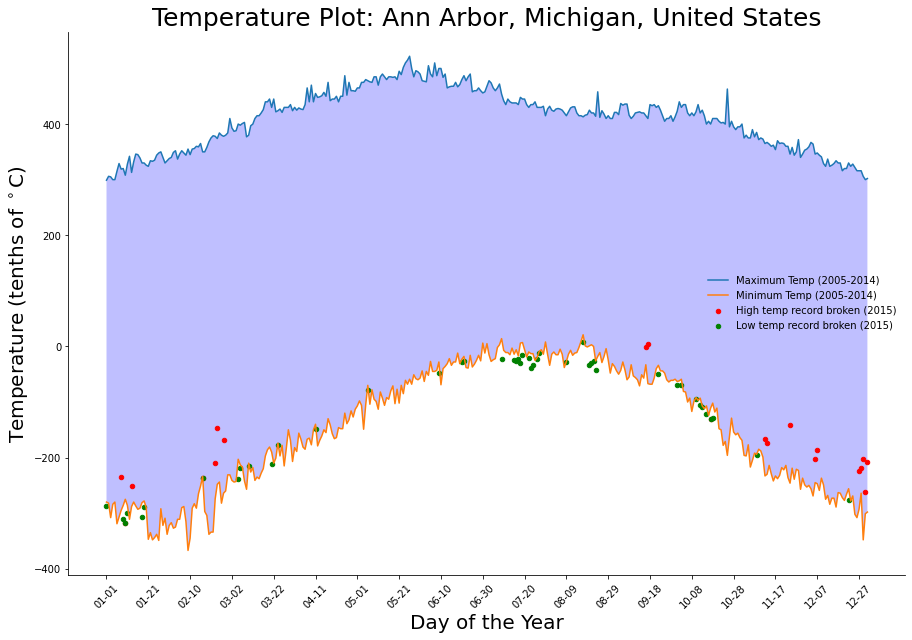

In [20]:
plt.figure(figsize=([15,10]))

plt.plot(temp_max.values, label='Maximum Temp (2005-2014)')
plt.plot(temp_min.values, label='Minimum Temp (2005-2014)')

plt.gca().fill_between(range(len(temp_min)), temp_min['Data_Value'],temp_max['Data_Value'], facecolor='blue', alpha=0.25)

plt.xticks(range(0, len(temp_min), 20), temp_min.index[range(0, len(temp_min), 20)], rotation = '45')

plt.scatter(broken_max, temp_min_15.iloc[broken_max], s=20, color='red', label='High temp record broken (2015)')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s=20, color='green', label='Low temp record broken (2015)')

plt.legend(frameon = False)

plt.xlabel('Day of the Year',fontsize=20)
plt.ylabel('Temperature (tenths of $^\circ$C)',fontsize=20)
plt.title('Temperature Plot: Ann Arbor, Michigan, United States',fontsize=25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()